In [1]:
# imports 
# data science tools 
import pandas as pd
import numpy as np

#modeling tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier # will need to use Tfidf for this 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
# tree based shit
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from IPython.display import Image

#plotting tools
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


! pwd

! cd /Users/katychow/DSI/Projects/project-3/RedditDataFiles

! ls

In [2]:
csv1 = pd.read_csv('/Users/katychow/DSI/Projects/project-3/Data/Reddit_MH_201812160842.csv')
csv2 = pd.read_csv('/Users/katychow/DSI/Projects/project-3/Data/Reddit_Psych_201812182015.csv')
csv3 = pd.read_csv('/Users/katychow/DSI/Projects/project-3/Data/Reddit_Sleep_201812160820.csv')

In [3]:
csv1.shape, csv2.shape #, csv3.shape

((988, 10), (993, 10))

In [4]:
len(set(csv2.title))

857

In [5]:
csv1.head(1)

,downs,likes,num_comments,score,subreddit,time_of_pull,title,ups,url,view_count
0,0,NaN,0,1,mentalhealth,2018-12-16 08:20:31.781459,Why am I afraid to express myself?,1,https://www.reddit.com/r/mentalhealth/comments...,NaN


In [6]:
csv2.head(1)

,downs,likes,num_comments,score,subreddit,time_of_pull,title,ups,url,view_count
0,0,NaN,31,12,psychology,2018-12-18 20:24:57.575629,Psychological Research/Surveys Thread (December),12,https://www.reddit.com/r/psychology/comments/a...,NaN


In [7]:
#csv3.head(1)

In [8]:
data = pd.concat([csv1,csv2]) #,csv3

In [9]:
# data.drop_duplicates(cols=['title','url']).shape

In [10]:
data.isnull().sum()

downs              0
likes           1981
num_comments       0
score              0
subreddit          0
time_of_pull       0
title              0
ups                0
url                0
view_count      1981
dtype: int64

In [11]:
data.dropna(axis=1,inplace=True)

In [12]:
# need to test if score == ups
data['Score_eq_ups'] = np.where(data['score']==data['ups'],1,0)

data.Score_eq_ups.value_counts()

1    1981
Name: Score_eq_ups, dtype: int64

In [13]:
# test_ds.drop(columns=['score','Score_eq_ups'],inplace=True)
data.drop(columns=['downs'],inplace=True)

In [14]:
data.head(2)

,num_comments,score,subreddit,time_of_pull,title,ups,url,Score_eq_ups
0,0,1,mentalhealth,2018-12-16 08:20:31.781459,Why am I afraid to express myself?,1,https://www.reddit.com/r/mentalhealth/comments...,1
1,22,204,mentalhealth,2018-12-16 08:20:31.781468,"I was talked out of an abortion at 18, now I'm...",204,https://www.reddit.com/r/mentalhealth/comments...,1


In [15]:
data['subreddit'].value_counts(normalize=True)

psychology      0.501262
mentalhealth    0.498738
Name: subreddit, dtype: float64

In [16]:
data['subreddit_num'] = data['subreddit'].map({'mentalhealth':0,'psychology':1}) #'sleep':1,

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_comments,1981.0,7.817769,22.319503,0.0,0.0,2.0,5.0,449.0
score,1981.0,83.385664,262.167717,0.0,2.0,5.0,16.0,3278.0
ups,1981.0,83.385664,262.167717,0.0,2.0,5.0,16.0,3278.0
Score_eq_ups,1981.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
subreddit_num,1981.0,0.501262,0.500125,0.0,0.0,1.0,1.0,1.0


In [18]:
data.corr()

,num_comments,score,ups,Score_eq_ups,subreddit_num
num_comments,1.000000,0.771232,0.771232,NaN,0.177721
score,0.771232,1.000000,1.000000,NaN,0.289314
ups,0.771232,1.000000,1.000000,NaN,0.289314
Score_eq_ups,NaN,NaN,NaN,NaN,NaN
subreddit_num,0.177721,0.289314,0.289314,NaN,1.000000


In [19]:
X = data['title']
y = data['subreddit_num']

### note to self, countvectorizer needs to take in a series in order for you to create all columns
```python
[i for i in X[:3]] 
```

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.3 , stratify=y)

In [21]:
X_train.shape

(1386,)

In [22]:
y_train.shape

(1386,)

In [23]:
!pwd

/Users/katychow/DSI/Projects/project-3/Code


In [24]:
X_train.head()

923    Lesson learned: Do not show vulnerability to a...
452    Been on ~5 hours sleep for about 5 weeks and i...
616    New nerd-mind post: Why are nerds so anxious a...
523    Casino lights and sounds encourage risky decis...
235    My girlfriend is a part of quite a non-functio...
Name: title, dtype: object

In [25]:
# X_train.to_csv('/Users/katychow/DSI/Projects/project-3/Data/train_ds.csv',index = False,header=True)

### starting with count vectorizer

In [26]:
cv = CountVectorizer(stop_words='english',ngram_range=(1,1))

In [27]:
cv.fit(X_train)

X_train_cntvect = cv.transform(X_train)
X_test_cntvect = cv.transform(X_test)

In [28]:
pd.DataFrame(X_train_cntvect.todense(),columns=cv.get_feature_names()).head(2)

,000,004,007,030,10,100,1000,102,105,11,...,years,yelled,yells,yesterday,young,youngest,youth,zebrafish,zero,zhang
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# d = cv.vocabulary_
# pd.DataFrame(sorted(d.items(), key=lambda x: x[1],reverse = True))

# let's put together a dataset of the words


In [30]:
X_train_cntvect.shape

(1386, 3965)

In [31]:
# run logistic regression
lr = LogisticRegressionCV()
lr.fit(X_train_cntvect,y_train)
lr.score(X_train_cntvect,y_train), lr.score(X_test_cntvect,y_test)

(0.9956709956709957, 0.8991596638655462)

In [32]:
confusion_matrix(y_test, lr.predict(X_test_cntvect))

array([[289,   8],
       [ 52, 246]])

In [33]:
# lr.coef_

In [34]:
coef_df = pd.DataFrame({
    'coef' : cv.get_feature_names(),
    'val': lr.coef_[0] # this is only for psychology
})

In [35]:
coef_df.sort_values('val').head(20)

,coef,val
1691,help,-1.654888
1658,hate,-1.517001
2235,mental,-1.186699
3149,scared,-1.171996
2930,really,-1.146569
2888,quite,-1.128596
2113,looking,-1.115827
1782,ill,-1.089092
1501,friend,-1.073664
3594,therapist,-1.069354


In [69]:
coef_df.sort_values('val',ascending=False).head(20).to_csv
coef_df.to_csv('psychology_predictors_LR.csv',index=False)

### try Multinomial NB

In [37]:
nb = MultinomialNB()
nb.fit(X_train_cntvect,y_train)
nb.score(X_train_cntvect,y_train), nb.score(X_test_cntvect,y_test)

(0.950937950937951, 0.8705882352941177)

In [38]:
confusion_matrix(y_test,nb.predict(X_test_cntvect))

array([[247,  50],
       [ 27, 271]])

In [39]:
coef_df_MNB = pd.DataFrame({
    'coef' : cv.get_feature_names(),
    'val': nb.coef_[0] # this is only for psychology
})

In [40]:
coef_df_MNB.sort_values('val').head(20)

,coef,val
1982,jumpscares,-9.510149
2825,proxy,-9.510149
2819,proudly,-9.510149
881,crush,-9.510149
891,cure,-9.510149
2798,prolong,-9.510149
894,current,-9.510149
901,cymbalta,-9.510149
902,dad,-9.510149
904,dae,-9.510149


In [41]:
coef_df_MNB.sort_values('val',ascending=False).head(20)

,coef,val
3447,study,-4.289793
2398,new,-4.506202
2586,people,-4.642614
3043,research,-4.945800
517,brain,-5.206084
3313,social,-5.367014
1433,finds,-5.467097
977,depression,-5.484797
2842,psychology,-5.521165
3192,self,-5.618328


### test KNN with tdifty blah blah

In [42]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,3)) # somehow stopwords are making KNN worse off...?????? 
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train_tfidf,y_train)
knn.score(X_train_tfidf,y_train), knn.score(X_test_tfidf,y_test)

(0.5093795093795094, 0.5058823529411764)

In [44]:
confusion_matrix(y_test, knn.predict(X_test_tfidf))

array([[297,   0],
       [294,   4]])

### using Tditf and logistic/mulitnomialnb

In [45]:
lr = LogisticRegressionCV()
lr.fit(X_train_tfidf,y_train)
lr.score(X_train_tfidf,y_train),lr.score(X_test_tfidf,y_test)

(0.9978354978354979, 0.892436974789916)

In [46]:
nb = MultinomialNB()
nb.fit(X_train_tfidf,y_train)
nb.score(X_train_tfidf,y_train),nb.score(X_test_tfidf,y_test)

(0.9906204906204906, 0.8756302521008403)

* Using ngram_range 2,3 will really kill Multinomial NB , but range 1-3 did not kill performance

### overall for logistic and MultinomialNB excluding stop words will help the predictions but not when using KNN 

## trying some sentiment analysis as well

In [47]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# now to format texts for sentimentanalyzer
corpus = list(X)

sia = SentimentIntensityAnalyzer()

polarity_scores = [sia.polarity_scores(i) for i in corpus]

parsed_scores = []
for i in polarity_scores:
    parse_score = {}
    parse_score['compound'] = i['compound']
    parse_score['neg'] = i['neg']
    parse_score['neu'] = i['neu']
    parse_score['pos'] = i['pos']
    parsed_scores.append(parse_score)

data['compound'] = [i['compound'] for i in polarity_scores]
data['neg'] = [i['neg'] for i in polarity_scores]
data['neu'] = [i['neu'] for i in polarity_scores]
data['pos'] = [i['pos'] for i in polarity_scores]
data.head(2)

,num_comments,score,subreddit,time_of_pull,title,ups,url,Score_eq_ups,subreddit_num,compound,neg,neu,pos
0,0,1,mentalhealth,2018-12-16 08:20:31.781459,Why am I afraid to express myself?,1,https://www.reddit.com/r/mentalhealth/comments...,1,0,0.000,0.00,1.00,0.0
1,22,204,mentalhealth,2018-12-16 08:20:31.781468,"I was talked out of an abortion at 18, now I'm...",204,https://www.reddit.com/r/mentalhealth/comments...,1,0,-0.743,0.27,0.73,0.0


In [48]:
data.groupby(['subreddit'])['neg','neu','pos','compound','ups'].mean()

,neg,neu,pos,compound,ups
subreddit,,,,,
mentalhealth,0.188836,0.699506,0.111657,-0.104959,7.364372
psychology,0.117429,0.778846,0.103729,-0.011933,159.024169


### do I want to do any cleaning for the title using REGEX?????? - I SHOULD! 

In [49]:
# for i in data['title']:
#     print(i)

### Now to do 1 tree based model - Let's work on a random forest & trim with gridsearch CV

In [50]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators' : [10,50,100]
    ,'criterion' : ['gini','entropy']
    ,'max_depth': [None,5,10]
    ,'max_leaf_nodes':[None,10,20,50]
}
gs = GridSearchCV(rf, param_grid=rf_params,cv=5)
gs.fit(X_train_tfidf,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10], 'max_leaf_nodes': [None, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [51]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_leaf_nodes': None,
 'n_estimators': 100}

In [52]:
gs.best_score_

0.841991341991342

In [53]:
gs.score(X_train_tfidf,y_train),gs.score(X_test_tfidf,y_test)

(0.9985569985569985, 0.8588235294117647)

### Create Visualizations

In [54]:
dtc = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
dtc.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
dtc.score(X_train_tfidf,y_train),dtc.score(X_test_tfidf,y_test)

(0.772005772005772, 0.7747899159663866)

In [56]:
from datetime import datetime
# need to refactor to create trees? 
export_graphviz(dtc,
               'psycho-or-mentalhealth.dot',
               feature_names=tfidf.get_feature_names(),
               class_names=['psychology', 'mentalhealth'],
               filled=True,
               rounded=True
               )

graph = pydotplus.graph_from_dot_file('psycho-or-mentalhealth.dot')

# #Image(graph.create_png())
now = datetime.now()
graph.write_png('psycho-or-mentalhealth'+now.strftime('%Y%m%d%H%S')+'.png')

True

In [57]:
# !open psycho-or-mentalhealth.png

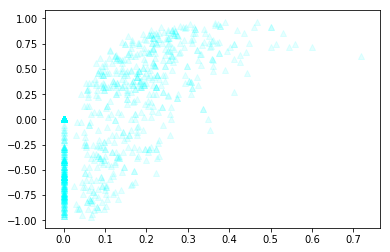

In [58]:
plt.scatter(data[data['subreddit_num']==1]['pos'],data[data['subreddit_num']==1]['compound'],color='cyan',alpha = 0.1,marker='^')

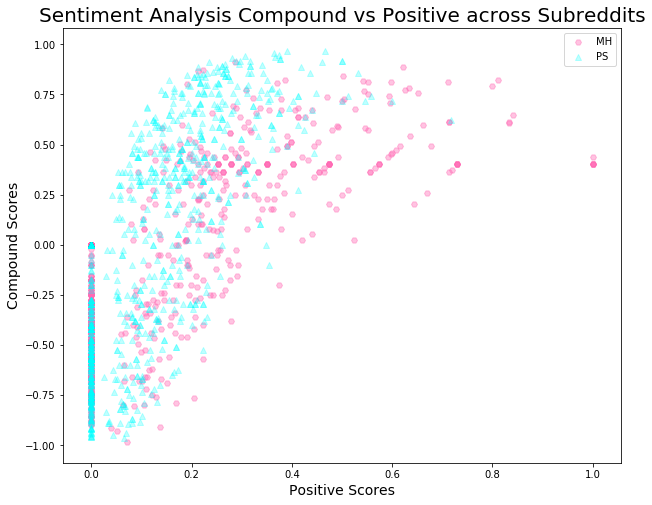

In [72]:
plt.figure(figsize = (10,8))

a = plt.scatter(data[data['subreddit_num']==0]['pos'],data[data['subreddit_num']==0]['compound'], color = 'hotpink',alpha = 0.4,marker='H')
b = plt.scatter(data[data['subreddit_num']==1]['pos'],data[data['subreddit_num']==1]['compound'],color='cyan',alpha = 0.25,marker='^')
plt.legend((a,b),
           ('MH','PS'),
           loc = 'best'
          )
plt.xlabel('Positive Scores',size=14)
plt.ylabel('Compound Scores',size=14)
plt.title('Sentiment Analysis Compound vs Positive across Subreddits', size =20)
plt.savefig('RedditComparisonSentiments_pos2.png')

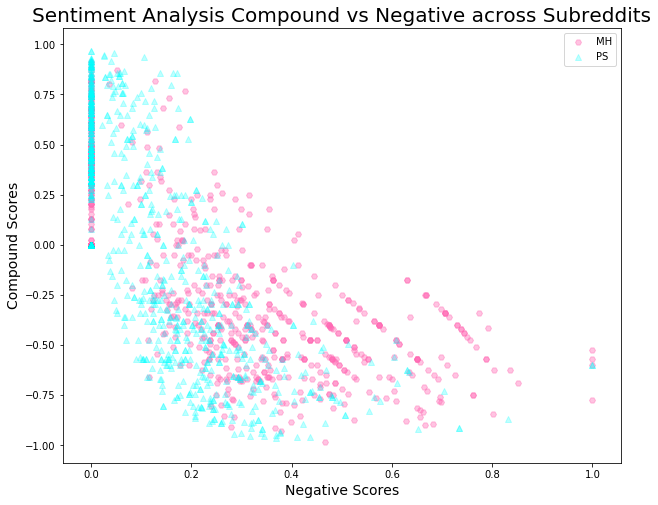

In [71]:
plt.figure(figsize = (10,8))

a = plt.scatter(data[data['subreddit_num']==0]['neg'],data[data['subreddit_num']==0]['compound'], color = 'hotpink',alpha = 0.4,marker='H')
b = plt.scatter(data[data['subreddit_num']==1]['neg'],data[data['subreddit_num']==1]['compound'],color='cyan',alpha = 0.25,marker='^')
plt.legend((a,b),
           ('MH','PS'),
           loc = 'best'
          )
plt.xlabel('Negative Scores',size=14)
plt.ylabel('Compound Scores',size=14)
plt.title('Sentiment Analysis Compound vs Negative across Subreddits', size =20)
plt.savefig('RedditComparisonSentiments_neg2.png')

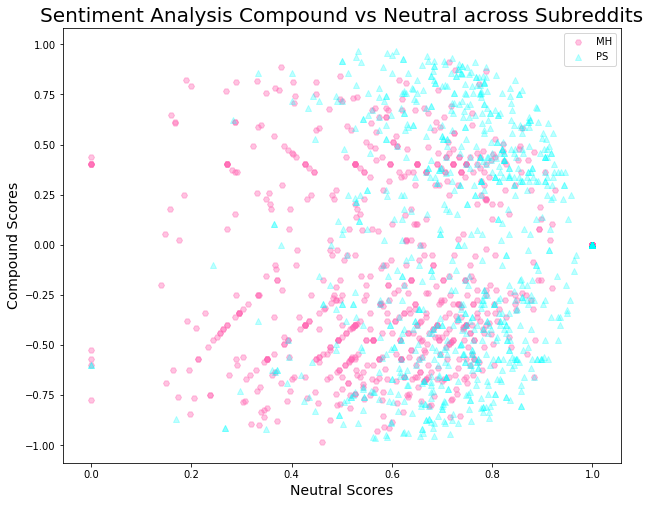

In [70]:
plt.figure(figsize = (10,8))

a = plt.scatter(data[data['subreddit_num']==0]['neu'],data[data['subreddit_num']==0]['compound'], color = 'hotpink',alpha = 0.4,marker='H')
b = plt.scatter(data[data['subreddit_num']==1]['neu'],data[data['subreddit_num']==1]['compound'],color='cyan',alpha = 0.25,marker='^')
plt.legend((a,b),
           ('MH','PS'),
           loc = 'best'
          )
plt.xlabel('Neutral Scores',size=14)
plt.ylabel('Compound Scores',size=14)
# plt.xticks(ticks=[-0.5,-0.25,0,0.25,0.5])
plt.title('Sentiment Analysis Compound vs Neutral across Subreddits', size =20)
plt.savefig('RedditComparisonSentiments_neu2.png')